<a href="https://colab.research.google.com/github/Ater97/DeepLearningKeras/blob/master/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/24
60000/60000 [==============================] - 49s 819us/step - loss: 0.6818 - acc: 0.7513 - val_loss: 0.4446 - val_acc: 0.8332
Epoch 2/24
60000/60000 [==============================] - 49s 823us/step - loss: 0.4532 - acc: 0.8355 - val_loss: 0.4009 - val_acc: 0.8475
Epoch 3/24
60000/60000 [==============================] - 50s 830us/step - loss: 0.3950 - acc: 0.8569 - val_loss: 0.3584 - val_acc: 0.8676
Epoch 4/24
60000/60000 [==============================] - 50s 830us/step - loss: 0.3621 - acc: 0.8694 - val_loss: 0.3450 - val_acc: 0.8715
Epoch 5/24
60000/60000 [==============================] - 50s 830us/step - loss: 0.3383 - acc: 0.8778 - val_loss: 0.3135 - val_acc: 0.8864
Epoch 6/24
60000/60000 [==============================] - 50s 828us/step - loss: 0.3183 - ac

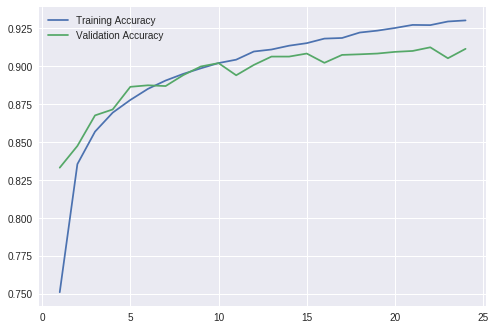

In [12]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Supress warnig
import os 
os.environ['TF_CPP_MiN_LOG_LEVEL']='2'

# Number of classes 
num_classes = 10

# Sizes of batch and # of epochs of data
batch_size = 128
epochs = 24

# Input image dimensions
img_rows, img_cols = 28, 28

# data, shuffled and split between and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Deal with format issues between different backends
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
  
# Type convert and scale the test and trainig data  
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /=255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = Sequential()
#convolution
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#categori...
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Define compile to minimize categoricl loss, use ada delta optimized
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
#Train model and test
hist = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test, y_test))

# Evaluate the model with the test data to get the scores on "real" data.
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Tets accuracy',score[1])

#  Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
epoch_list = list(range(1, len(hist.history['acc']) + 1)) #values for x axis
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

